## Fall 2020 CX4641/CS7641 A Homework 2

## Instructor: Dr. Mahdi Roozbahani

## Deadline: Oct 6th, Tuesday, 11:59 pm AOE

* No unapproved extension of the deadline is allowed. Late submission will lead to 0 credit. 

* Discussion is encouraged on Piazza as part of the Q/A. However, all assignments should be done individually.


## Instructions for the assignment

- This assignment consists of both programming and theory questions.

- Q4 is bonus for both undergraduate and graduate students.

- To switch between cell for code and for markdown, see the menu -> Cell -> Cell Type
    
- You can directly type Latex equations into markdown cells.

- Typing with Latex\markdown is required for all the written questions. Handwritten answers will not be accepted. 
    
- If a question requires a picture, you could use this syntax $"<img src="" style="width: 300px;"/>"$ to include them within your ipython notebook.

## Using the autograder

- You will find two assignments on Gradescope that correspond to HW2: "HW2 - Programming" and "HW2 - Non-programming".

- You will submit your code for the autograder on "HW2 - Programming" in the following format:

    * kmeans.py
    * gmm.py
    * semisupervised.py

- All you will have to do is to copy your implementations of the classes "Kmeans", "GMM", "CleanData", "SemiSupervised" onto the respective files. We provided you different .py files and we added libraries in those files please DO NOT remove those lines and add your code after those lines. Note that these are the only allowed libraries that you can use for the homework.

- You are allowed to make as many submissions until the deadline as you like. Additionally, note that the autograder tests each function separately, therefore it can serve as a useful tool to help you debug your code if you are not sure of what part of your implementation might have an issue.

- **For the "HW2 - Non-programming" part, you will download your jupyter notbook as html and submit it as a PDF on Gradescope. To download the notebook as PDF, click on "File" on the top left corner of this page and select "Download as > PDF". The non-programming part corresponds to Q2, Q3.3 (both your response and the generated images with your implementation) and Q4.2**
- **When submitting to Gradescope, please make sure to mark the page(s) corresponding to each problem/sub-problem.**

## 2. EM algorithm [20 pts]


### 2.1 Performing EM Update [10 pts]

A univariate Gaussian Mixture Model (GMM) has two components, both of which have their own mean and standard deviation. The model is defined by the following parameters:

$$ \mathbf{z} \sim Bernoulli(\theta) $$
$$ \mathbf{p(x|z=0)} \sim \mathcal{N}(\mu, \sigma) $$
$$ \mathbf{p(x|z=1)} \sim \mathcal{N}(2\mu, 3\sigma) $$

For a dataset of N datapoints, find the following: 


2.1.1. Write the marginal probability of x, i.e. $\mathbf{p(x)}$  \[2pts] 

$\mathbf{p(x)} = \sum^{Z} p(z) p(x|z) = \sum^{K} p(z_{k}) \mathcal{N}(x | \mu_{k}, \sigma_{k})$

2.1.2. E-Step: Compute the posterior probability, i.e, $p(z^i=k|x^i)$, where k = {0,1} \[2pts]

$p(z^{i} = k | x^{i}) = \frac{p(z^{i} = k) p(x^{i} | z^i=k)}
 {\sum_{j=1}^{K} p(z^{i} = k_{j}) p(x^{i} | z^{i} = k_{j})}=
 \frac{p(z^{i} = k) \mathcal{N}(x^{i} | \mu_{k}, \sigma_{k})}
 {\sum_{j=1}^{K} p(z^{i} = k_{j}) \mathcal{N}(x^{i} | \mu_{k_{j}}, \sigma_{k_{j}})}$

for $k = 0:$

$p(z^{i} = 0 | x^{i}) = \frac{p(z^{i} = 0) \mathcal{N}(x^{i} | \mu_{0}, \sigma_{0})}
 {\sum_{j=1}^{K} p(z^{i} = k_{j}) \mathcal{N}(x^{i} | \mu_{k_{j}}, \sigma_{k_{j}})}
 = \frac{\theta \mathcal{N}(x^{i} | \mu, \sigma)}{\theta \mathcal{N}(x^{i} | \mu, \sigma)+
 (1 - \theta) \mathcal{N}(x^{i} | 2\mu, 3\sigma)}$

for $k = 1:$

$p(z^{i} = 1 | x^{i}) = \frac{p(z^{i} = 1) \mathcal{N}(x^{i} | \mu_{1}, \sigma_{1})}
 {\sum_{j=1}^{K} p(z^{i} = k_{j}) \mathcal{N}(x^{i} | \mu_{k_{j}}, \sigma_{k_{j}})}
 = \frac{(1 - \theta) \mathcal{N}(x^{i} | 2\mu, 3\sigma)}{\theta \mathcal{N}(x^{i} | \mu, \sigma)+
 (1 - \theta) \mathcal{N}(x^{i} | 2\mu, 3\sigma)}$

2.1.3. M-Step: Compute the updated value of $\mu$ (You can keep $\sigma$ fixed for this) \[3pts]

$l(x | \theta) = \sum^{N} \sum^{Z} p(z_{k} | x_{n}, \theta_{old})\ln{[p(x_{n},z_{k}|\theta)]} =
 \sum^{N} \sum^{Z} p(z_{k} | x_{n}, \theta_{old})\ln{[p(z_{k})\mathcal{N}(x_{n}|\mu_{k},\sigma_{k})]}$

$l(x | \theta) = \sum^{N} \sum^{Z} p(z_{k} | x_{n}, \theta_{old})\ln{[p(z_{k})
 \frac{1}{\sqrt{2\pi \sigma_{k}^{2}}}e^{\frac{-(x_{n} - \mu_{k})^{2}}{2\sigma_{k}^{2}}}]}$

$l(x | \theta) = \sum^{N} \sum^{Z} p(z_{k} | x_{n}, \theta_{old})[\ln{p(z_{k}) +
 \ln{\frac{1}{\sqrt{2\pi \sigma_{k}^{2}}}} - \frac{(x_{n}-\mu_{k})^{2}}{2\sigma_{k}^{2}}}]$

$\frac{\partial l(x | \theta)}{\partial \mu_{k}} = \sum^{N} p(z_{k} | x_{n}, \theta_{old})
 [-\frac{2(x_{n}-\mu_{k})(-1)}{2\sigma_{k}^{2}}] = 0$

$\sum^{N} p(z_{k} | x_{n}, \theta_{old})[\frac{(x_{n}-\mu_{k})}{\sigma_{k}^{2}}] = 0$

$\frac{\sum^{N} p(z_{k} | x_{n}, \theta_{old})(x_{n}-\mu_{k})}{\sigma_{k}^{2}} = 0$

$\sum^{N} p(z_{k} | x_{n}, \theta_{old})\mu_{k}^{new} = \sum^{N} p(z_{k} | x_{n}, \theta_{old})x_{n}$

$\mu_{k}^{new} = \frac{\sum^{N} p(z_{k} | x_{n}, \theta_{old})x_{n}}{\sum^{N} p(z_{k} | x_{n}, \theta_{old})}$

2.1.4. M-Step: Compute the updated value for $\sigma$ (You can keep $\mu$ fixed for this) \[3pts]

$l(x | \theta) = \sum^{N} \sum^{Z} p(z_{k} | x_{n}, \theta_{old})[\ln{p(z_{k}) +
 \ln{\frac{1}{\sqrt{2\pi \sigma_{k}^{2}}}} - \frac{(x_{n}-\mu_{k})^{2}}{2\sigma_{k}^{2}}}]$

$l(x | \theta) = \sum^{N} \sum^{Z} p(z_{k} | x_{n}, \theta_{old})[\ln{p(z_{k}) -
 \ln{\sqrt{2\pi \sigma_{k}^{2}}} - \frac{(x_{n}-\mu_{k})^{2}}{2\sigma_{k}^{2}}}]$

$\frac{\partial l(x | \theta)}{\partial \sigma_{k}} = \sum^{N} p(z_{k} | x_{n}, \theta_{old})
 [\frac{(x_{n}-\mu_{k})^{2}}{\sigma_{k}^{3}} - \frac{1}{\sigma_{k}}] = 0$

$\frac{\sum^{N} p(z_{k} | x_{n}, \theta_{old})[(x_{n}-\mu_{k})^{2} - \sigma_{k}^{2}]}{\sigma_{k}^{3}} = 0$

$\sum^{N} p(z_{k} | x_{n}, \theta_{old})\sigma_{k}^{2} = \sum^{N} p(z_{k} | x_{n}, \theta_{old})(x_{n}-\mu_{k})^{2}$

$\sigma^{new} = \sqrt{\frac{\sum^{N} p(z_{k} | x_{n}, \theta_{old})(x_{n}-\mu_{k})^{2}}{\sum^{N} p(z_{k} | x_{n}, \theta_{old})}}$

### 2.2 EM Algorithm in ABO Blood Groups [10 pts]

In the ABO blood group system, each individual has a phenotype and a genotype as shown below. The genotype is made of underlying alleles (A, B, O).

$$
\begin{array}{|c|c|}\hline Phenotype & Genotype   \\ \hline A & AA   \\ \hline A & AO 
\\ \hline A & OA  \\ \hline B & BB  \\ \hline B & BO 
\\ \hline B & OB  \\ \hline O & OO \\ \hline AB & AB
\\\hline\end{array}
$$

In a research experiment, scientists wanted to model the distribution of the genotypes of the population. They collected the phenotype information from the participants as this could be directly observed from the individual's blood group. The scientists, however want to use this data to model the underlying genotype information. In order to help them obtain an understanding, you suggest using the EM algorithm to find out the genotype distribution.

You know that the probability of that an allele is present in an individual is independent of the probability of any other allele, i.e, $P(AO) = P(OA) = P(A)* P(O)$ and so on. Also note that the genotype pairs: (AO, OA) and (BO, OB) are identical and can be treated as AO, BO respectively. You also know that the alleles follow a multinomial distribution.
$$ p(O) = 1 - p(A) - p(B) $$

Let $ n_A, n_B, n_O, n_{AB}$ be the number of individuals with the phenotypes A, B, O and AB respectively.\
Let $ n_{AA}, n_{AO}, n_{BB}, n_{BO}, n_{AB} $ be the numbers of individuals with genotypes AA, AO, BB, BO and AB respectively.\
The satisfy the following conditions: 
$$ n_A = n_{AA} + n_{AO} $$ $$n_B = n_{BB} + n_{BO} $$
$$ n_A + n_B + n_O + n_{AB} = n $$


Given:
$$ p_A = p_B = p_O = \frac{1}{3} $$
$$ n_A = 186, n_B = 38, n_O = 284, n_{AB} = 13 $$

2.2.1. 
In the E step, compute the value of  $n_{AA}, n_{AO}, n_{BB}, n_{BO} $.  \[5pts]

$p(AA|A) = \frac{p(AA,A)}{p(A)} = \frac{p(AA)p(A)}{p(A,AA)+2p(A,AO)} = \frac{p(AA)p(A)}{p(A)p(AA)+2p(A)p(AO)} =
 \frac{p(AA)}{p(AA)+2p(AO)}$

$p(AA|A) = \frac{p(AA)}{p(AA)+2p(AO)} = \frac{\frac{1}{9}}{\frac{1}{9}+\frac{2}{9}} = \frac{\frac{1}{9}}{\frac{3}{9}} =
 \frac{1}{3}$

$n_{AA} = p(AA|A)n_{A} = \frac{1}{3} 186 = 62$

$p(AO|A) = \frac{p(AO)}{p(AA)+2p(AO)} = \frac{\frac{1}{9}}{\frac{1}{9}+\frac{2}{9}} = \frac{\frac{1}{9}}{\frac{3}{9}} =
 \frac{1}{3}$

$n_{AO} = 2p(AO|A)n_{A} = \frac{2}{3} 186 = 124$

$p(BB|B) = \frac{p(BB)}{p(BB)+2p(BO)} = \frac{\frac{1}{9}}{\frac{1}{9}+\frac{2}{9}} = \frac{\frac{1}{9}}{\frac{3}{9}} =
 \frac{1}{3}$

$n_{BB} = p(BB|B)n_{B} = \frac{1}{3} 38 = 12.667 \approx 13$

$p(BO|B) = \frac{p(BO)}{p(BB)+2p(BO)} = \frac{\frac{1}{9}}{\frac{1}{9}+\frac{2}{9}} = \frac{\frac{1}{9}}{\frac{3}{9}} =
 \frac{1}{3}$

$n_{BO} = 2p(BO|B)n_{B} = \frac{2}{3} 38 = 25.333 \approx 25$

2.2.2. In the M step, find the new value of $p_A, p_B$ given the updated values from E-step above.
(Round off the answer to 3 decimal places)   \[5pts]

$l(p|\theta) = \sum^{K} n_{k} \ln{p_{k}}$

$l(p|\theta) = n_{AA}\ln{[p_{AA}]} + n_{AO}\ln{[p_{AO}]} + n_{BB}\ln{[p_{BB}]} + n_{BO}\ln{[p_{BO}]} +
 n_{AB}\ln{[p_{AB}]} + n_{OO}\ln{[p_{OO}]}$

$l(p|\theta) = n_{AA}\ln{[p_{A}^{2}]} + n_{AO}\ln{[2p_{A}p_{B}]} + n_{BB}\ln{[p_{B}^{2}]} + n_{BO}\ln{[2p_{B}p_{O}]} +
 n_{AB}\ln{[p_{A}p_{B}]} + n_{OO}\ln{[p_{O}^{2}]}$

$\mathscr{L}(p,\lambda) = l(p|\theta) + \lambda(p_{A} + p_{B} + p_{O})$

$\frac{\partial \mathscr{L}(p,\lambda)}{\partial p_{A}} = \frac{2n_{AA} + n_{AO} + n_{AB}}{p_{A}} + \lambda = 0$

$\frac{\partial \mathscr{L}(p,\lambda)}{\partial p_{B}} = \frac{2n_{BB} + n_{BO} + n_{AB}}{p_{B}} + \lambda = 0$

$\frac{\partial \mathscr{L}(p,\lambda)}{\partial p_{O}} = \frac{n_{AO} + n_{BO} + 2n_{OO}}{p_{O}} + \lambda = 0$

$\frac{\partial \mathscr{L}(p,\lambda)}{\partial \lambda} = p_{A} + p_{B} + p_{O} - 1 = 0$

We can find $\lambda$ by taking the sum of the first three partials, given that $p_{A} = p_{B} = p_{O} = \frac{1}{3}$ and $n = n_{AA} + n_{AO} + n_{AB} + n_{BB} + n_{BO} + n_{OO}$:

$\frac{2(n_{AA} + n_{AO} + n_{AB} + n_{BB} + n_{BO} + n_{OO})}{\frac{1}{3}} = - 3\lambda$

$2n = -\lambda$

$\lambda = -2n$

To find $p_{A}^{new}$ we solve for $p_{A}$ in the partial with respect to $p_{A}$:

$\frac{2n_{AA} + n_{AO} + n_{AB}}{p_{A}^{new}} - 2n = 0$

$\frac{2n_{AA} + n_{AO} + n_{AB}}{p_{A}^{new}} = 2n$

$p_{A}^{new} = \frac{2n_{AA} + n_{AO} + n_{AB}}{2n} = \frac{124 + 124 + 13}{1042} = 0.2505$

To find $p_{B}^{new}$ we solve for $p_{B}$ in the partial with respect to $p_{B}$:

$\frac{2n_{BB} + n_{BO} + n_{AB}}{p_{B}^{new}} - 2n = 0$

$\frac{2n_{BB} + n_{BO} + n_{AB}}{p_{B}^{new}} = 2n$

$p_{B}^{new} = \frac{2n_{BB} + n_{BO} + n_{AB}}{2n} = \frac{26 + 25 + 13}{1042} = 0.0614$

## 3.3 Japanese art and pixel clustering [10pts + 5pts]

Ukiyo-e is a Japanese art genre predominant from the 17th through 19th centuries. In order to produce the intricate prints that came to represent the genre, artists carved wood blocks with the patterns for each color in a design. Paint would be applied to the block and later transfered to the print to form the image.
In this section, you will use your GMM algorithm implementation to do pixel clustering and estimate how many wood blocks were likely used to produce a single print. That is to say, how many wood blocks would appropriatly produce the original paint. 
(Hint: you can justify your answer based on visual inspection of the resulting images or on a different metric of your choosing)
#### You do NOT need to submit your code for this question to the autograder. Instead you should include whatever images/information you find relevant in the report.

iter 99, loss: 9831929.3941: 100%|██████████| 100/100 [04:15<00:00,  2.56s/it]


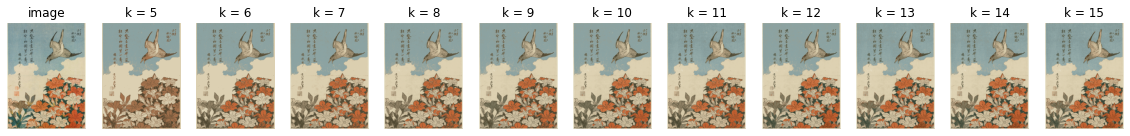

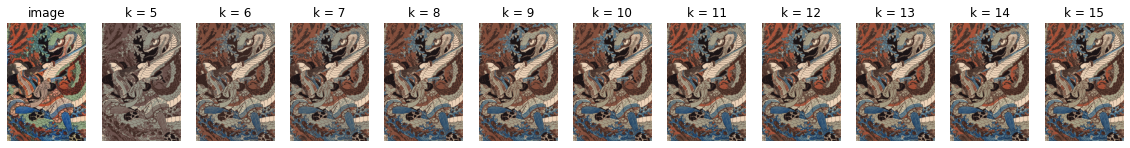

In [13]:
import imageio
# pick 2 of the images in this list:
url0 = 'https://upload.wikimedia.org/wikipedia/commons/b/b1/Utagawa_Kunisada_I_%28c._1832%29_Dawn_at_Futami-ga-ura.jpg'
url1 = 'https://upload.wikimedia.org/wikipedia/commons/9/95/Hokusai_%281828%29_Cuckoo_and_Azaleas.jpg'
url2 = 'https://upload.wikimedia.org/wikipedia/commons/7/74/Kitao_Shigemasa_%281777%29_Geisha_and_a_servant_carrying_her_shamisen_box.jpg'
url3 = 'https://upload.wikimedia.org/wikipedia/commons/1/10/Kuniyoshi_Utagawa%2C_Suikoden_Series_4.jpg'

# example of loading image from url0
image1 = imageio.imread(imageio.core.urlopen(url1).read())
image3 = imageio.imread(imageio.core.urlopen(url3).read())

# this is for you to implement
def find_n_woodblocks(image, min_clusters=5, max_clusters=15):
    """
    Using the helper function above to find the optimal number of woodblocks that can appropriatly produce a single image.
    You can simply examinate the answer based on your visual inspection (i.e. looking at the resulting images) or provide any metrics you prefer. 
    
    Args:
        image: input image of shape(H, W, 3)
        min_clusters, max_clusters: the minimum and maximum number of clusters you should test with. Default are 5 and 15.
        (Usually the maximum number of clusters would not exceed 15)
        
    Return:
        plot: comparison between original image and image pixel clustering.
        optional: any other information/metric/plot you think is necessary.
    """
    # raise NotImplementedError
    img_array = []
    for k in range(min_clusters, max_clusters + 1):
        clustered_img = cluster_pixels_gmm(image, k)
        img_array.append(clustered_img)
    plot_images([image] + img_array, ['image', 'k = 5', 'k = 6', 'k = 7', 'k = 8', 'k = 9', 'k = 10', 'k = 11', 'k = 12','k = 13', 'k = 14', 'k = 15'])

find_n_woodblocks(image1)
find_n_woodblocks(image3)

By visually inspecting the reconstructed images using GMM with increasing clusters from 5 to 15, we can see how the 
prints would look like if only that number of color wood blocks was used to create them. In order to decide which was 
the number of wood blocks used for the original we must inspect each reconstructed image with the original by increasing 
number of clusters until we reach the first one that fully represents all colors in the original. For the first image 
selected this happens at k = 13, meaning that for that print they probably used around 13 wood blocks. For the second 
one, it looks like they used 11 wood blocks (or 11 clusters in the case of the GMM algorithm).
